# Interpolation

In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Newton interpolation

$f(x)=a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)+...+a_n(x-x-0)...(x-x_n)$

Divided differences:

$f(x_1,x_0)=\frac{y_1-y_0}{x_1-x_0}$


### Example:

Find the polynomial function that goes through all the following data points:

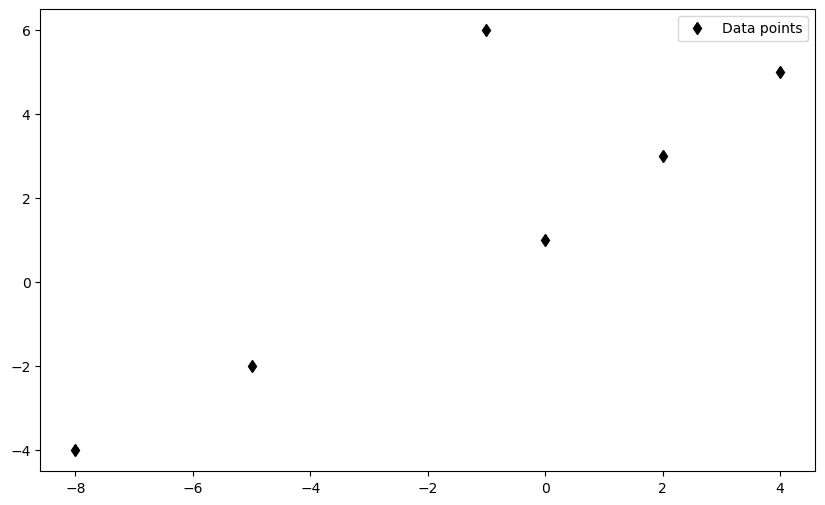

In [2]:
x = np.array([-8,-5, -1, 0, 2, 4])
y = np.array([-4,-2, 6, 1, 3, 5])

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y, marker='d', color ="black", linestyle=" ", label='Data points')
ax.legend()
plt.show()

In [3]:
# I copied this code from:
# https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x - x_data[n-k])*p
    return p

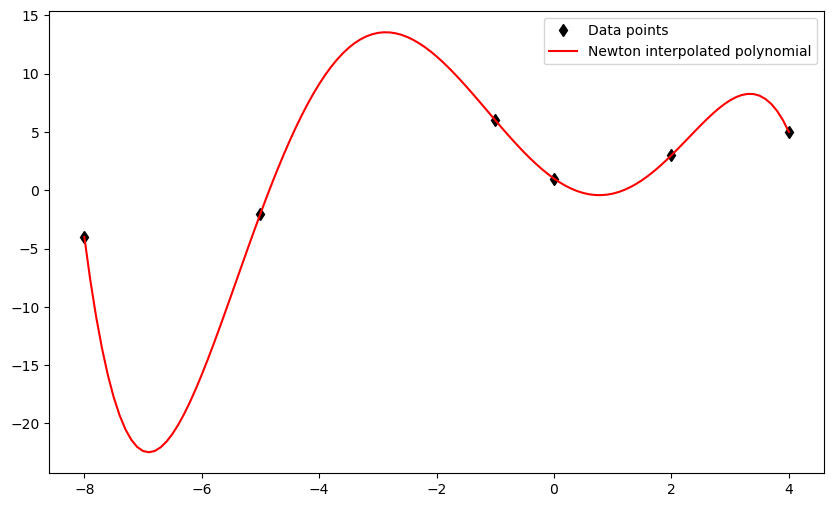

In [4]:
# get the divided difference coefficients
a_s = divided_diff(x, y)[0,:]

# evaluate on new data points
x_new = np.arange(-8, 4.1, 0.1)
y_new = newton_poly(a_s, x, x_new)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y, marker='d', color ="black", linestyle=" ", label='Data points') # Original data
ax.plot(x_new, y_new, color ="red", linestyle="-", label='Newton interpolated polynomial') # Newton interpolator
ax.legend()
plt.show()

## 2. Lagrange interpolation

In [5]:
from scipy.interpolate import lagrange

### Example 1:


In [6]:
# Example taken from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html

x = np.array([0, 1, 2])
y = x**3

poly = lagrange(x, y)

In [7]:
from numpy.polynomial.polynomial import Polynomial

Polynomial(poly.coef[::-1]).coef

array([ 0., -2.,  3.])

In [8]:
# New x-vector
x_new = np.arange(0, 2.1, 0.1)

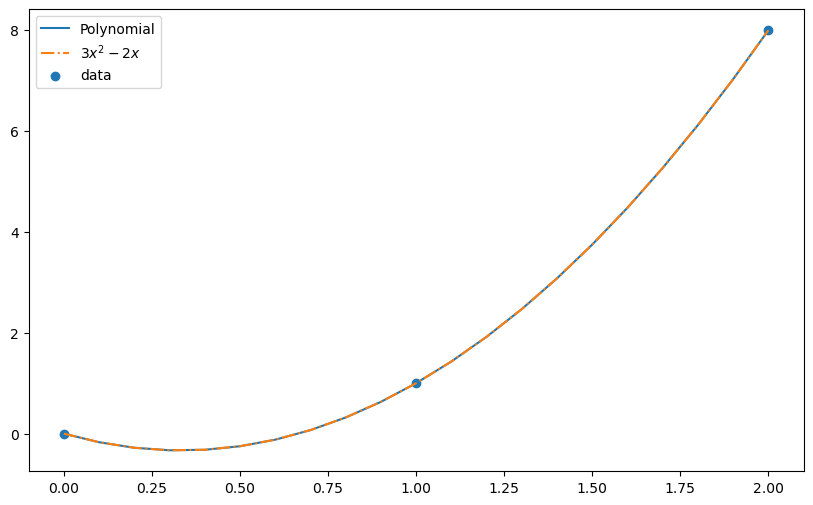

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

# Original data
ax.scatter(x, y, label='data')

# Lagrange polynomial
ax.plot(x_new, Polynomial(poly.coef[::-1])(x_new), label='Polynomial')

#Double checking
ax.plot(x_new, 3*x_new**2 - 2*x_new + 0*x_new, label=r"$3 x^2 - 2 x$", linestyle='-.')
ax.legend()
plt.show()

### Example 2

Let's go back to our data file for the free-fall experiment.

In [10]:
# read_csv returns a DataFrame, which is two-dimensional data structure with labeled axes.

data = pd.read_csv("data_freefall.csv")
print(data) # Uncomment to print data

# To get the data from specific columns, you can use their respective keys, e.g.:

time = data["Time (s)"]
position = data["Position (m)"]

    Time (s)  Position (m)
0        0.0           0.0
1        0.5           2.0
2        1.0           5.2
3        1.5           9.8
4        2.0          19.7
5        2.5          31.2
6        3.0          44.4
7        3.5          57.8
8        4.0          80.8
9        4.5         100.4
10       5.0         121.1


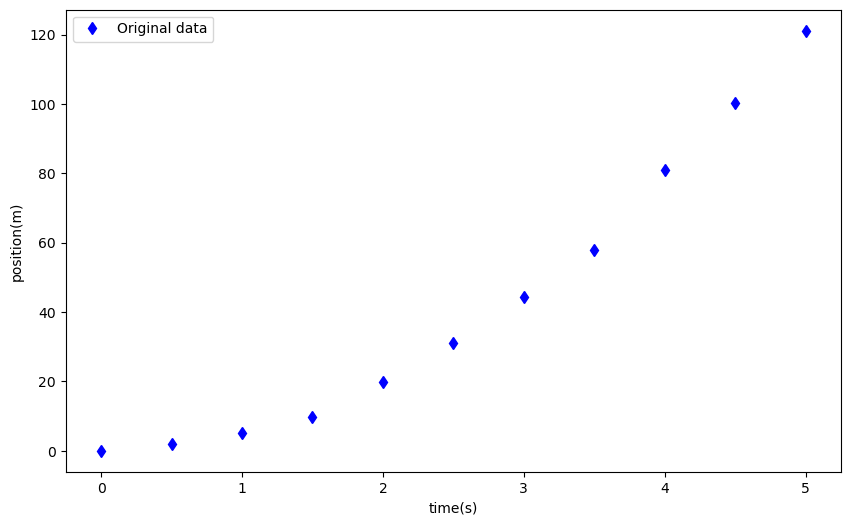

In [11]:
# And now we plot
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(time,position,color='blue', marker = "d", linestyle=" ", label="Original data")
#ax.plot(month_new,fl(month_new),color='red', linestyle="-", label="Lagrange interpolation")

ax.set_xlabel('time(s)')
ax.set_ylabel('position(m)')
ax.legend(loc=2)
plt.show()

In [12]:
f_lag = lagrange(time, position)

time_new = np.linspace(0, 5, num=101, endpoint=True)

In [13]:
Polynomial(f_lag.coef[::-1]).coef

print(Polynomial(f_lag.coef[::-1]))

poly([ 0.00000000e+00 -1.69934603e+02  9.35557111e+02 -2.00783834e+03
  2.31161297e+03 -1.59667935e+03  6.94851148e+02 -1.92073545e+02
  3.27007407e+01 -3.12416226e+00  1.28028219e-01])


In [14]:
print(f_lag)

       10         9        8         7         6        5        4
0.128 x  - 3.124 x + 32.7 x - 192.1 x + 694.9 x - 1597 x + 2312 x
         3         2
 - 2008 x + 935.6 x - 169.9 x


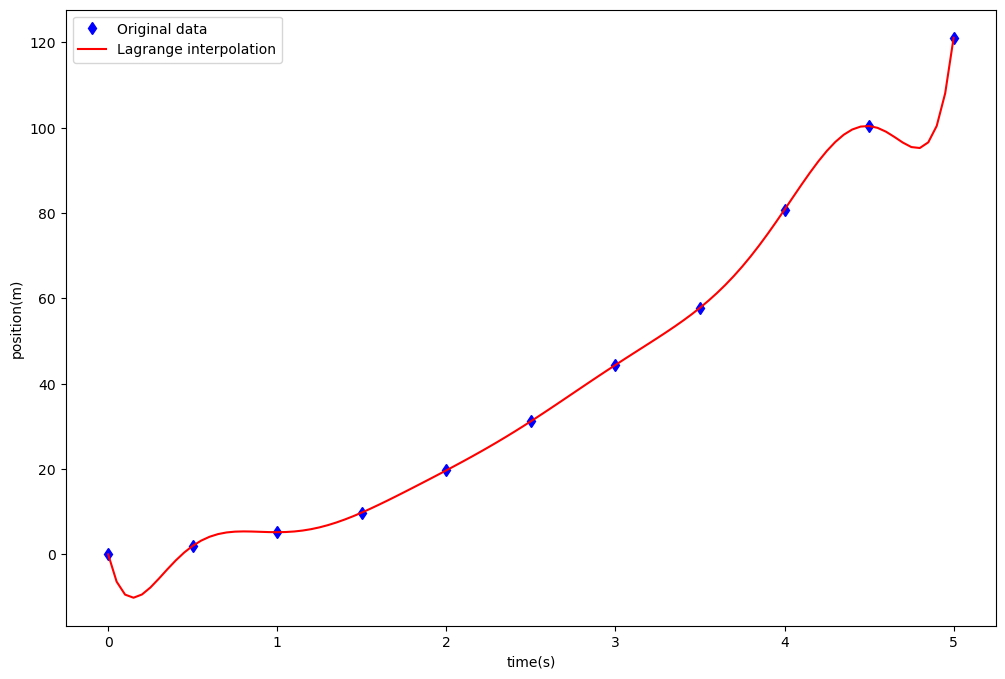

In [18]:
# And now we plot
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(time,position,color='blue', marker = "d", linestyle=" ", label="Original data")

ax.plot(time_new, f_lag(time_new), color='red', linestyle="-", label="Lagrange interpolation")

#ax.plot(time_new, Polynomial(f_lag.coef[::-1])(time_new), label='Polynomial')

ax.set_xlabel('time(s)')
ax.set_ylabel('position(m)')
ax.legend(loc=0)
plt.show()

# Very important:

- We know that this is not the relationship between position and time. 


- Lagrange interpolation is not the best when you know that variables are correlated. In that case, to get a good model, we should fit the data.


- Interpolation is not the same as fitting data!!!


- Interpolation adds extra points to existing points, but has no idea about correlations. It is NOT an optimisation problem.


In [19]:
time_reduced = np.array(time[::5])
position_reduced = np.array(position[::5])

print(time_reduced)

[0.  2.5 5. ]


In [20]:
f_lag2 = lagrange(time_reduced, position_reduced)

print(f_lag2)

       2
4.696 x + 0.74 x


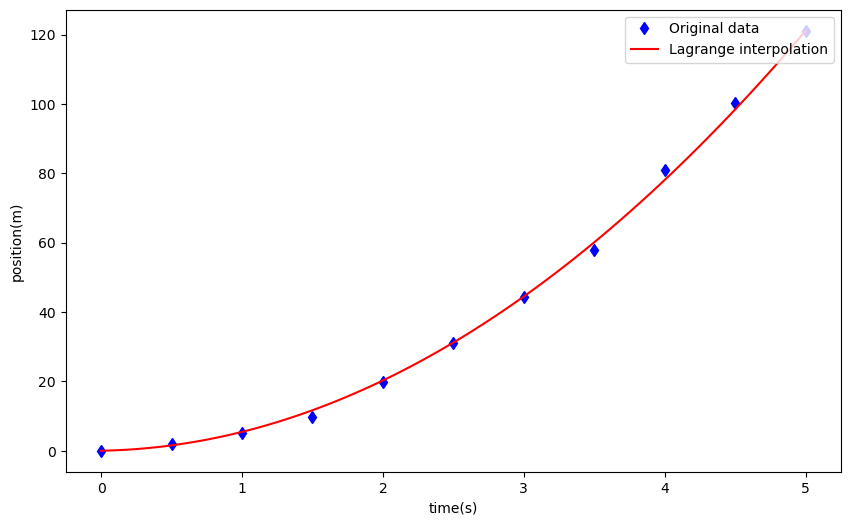

In [21]:
# And now we plot
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(time,position,color='blue', marker = "d", linestyle=" ", label="Original data")

ax.plot(time_new, f_lag2(time_new), color='red', linestyle="-", label="Lagrange interpolation")

ax.set_xlabel('time(s)')
ax.set_ylabel('position(m)')
ax.legend(loc=1)
plt.show()

## 2. Point to point interpolation with interp1d()

For 1D data we can use the function **scipy.interpolate.interp1d()** to carry out interpolation of different orders.


See documentation here:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html


Interpolation methods are useful for both time series and discrete data.

In [23]:
from scipy.interpolate import interp1d

### Same example 2 (e.g. linear vs. quadratic interpolation):

In [24]:
f_linear = interp1d(time, position, kind='linear')

f_quadra = interp1d(time, position, kind='quadratic')

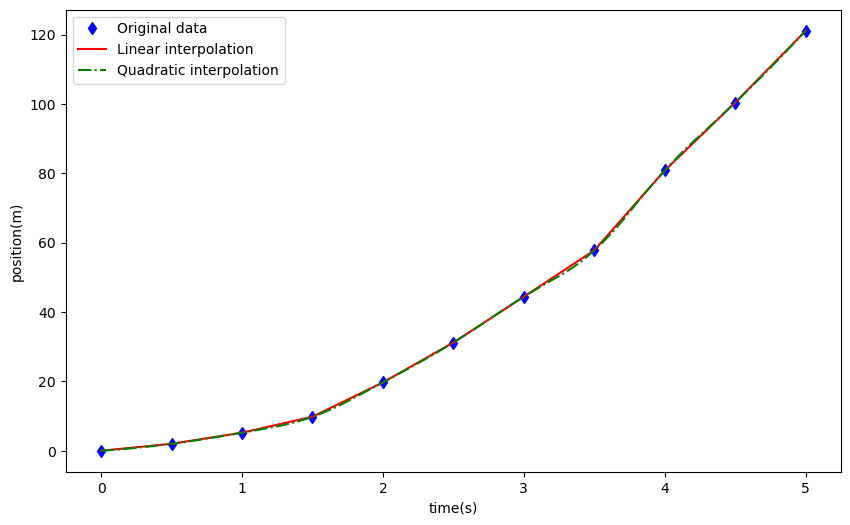

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15
 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85
 4.9  4.95 5.  ] [  0.           0.14150956   0.29601699   0.4635223    0.64402548
   0.83752655   1.04402548   1.2635223    1.49601699   1.74150956
   2.           2.27148832   2.55597452   2.85345859   3.16394054
   3.48742036   3.81990656   4.15740762   4.49992355   4.84745434
   5.2          5.55756053   5.92013592   6.28772618   6.6603313
   7.0379513    7.45253518   7.936032     8.48844174   9.10976441
   9.8         10.55914852  11.38720997  12.28418434  13.25007164
  14.28487187  15.3568823

In [28]:
# And now we plot
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(time, position, color='blue', marker = "d", linestyle=" ", label="Original data")

ax.plot(time_new, f_linear(time_new), color='red', linestyle="-", label="Linear interpolation")

ax.plot(time_new, f_quadra(time_new), color='green', linestyle="-.", label="Quadratic interpolation")

ax.set_xlabel('time(s)')
ax.set_ylabel('position(m)')
ax.legend(loc=0)
plt.show()

print(time_new, f_quadra(time_new))